In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
data= pd.read_csv('ccpp.csv')

In [ ]:
print(data.head())

      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43


In [ ]:
print(data.describe())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


<Axes: >

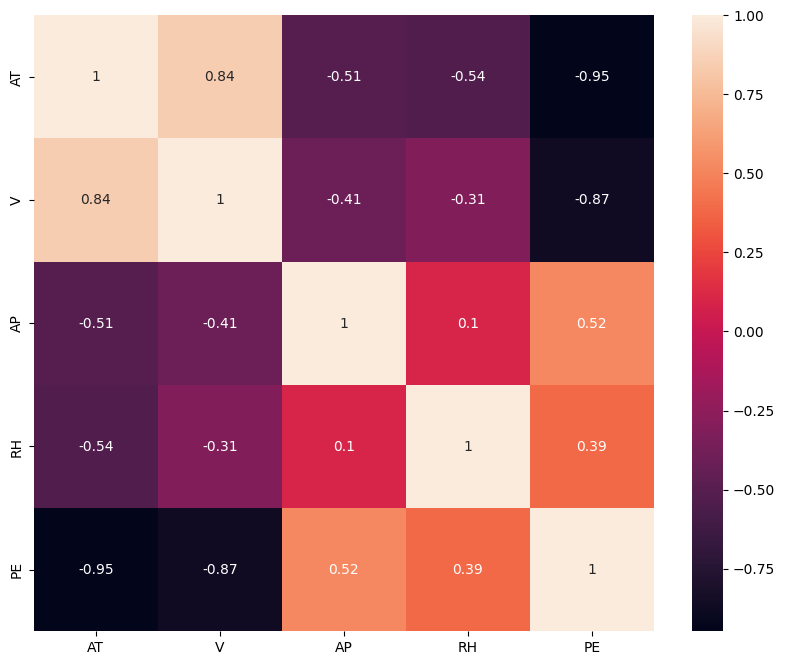

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
print(data.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [ ]:
data=data.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
from tensorflow.keras.models import Sequential

ann=Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

#giris verileri (4 * 6) + bir bias= 24 + 6 =30
ann.add(Input(shape=(4,)))
#giris verileri (4 * 8) + bir bias= 48 + 8 =56
ann.add(Dense(units=6,activation='relu'))
#giris verileri (4 * 1) + bir bias= 8 + 1 =9
ann.add(Dense(units=8,activation='relu'))
ann.add(Dense(units=1,activation='linear'))

In [ ]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=ann.fit(x_train,y_train,batch_size=16,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
479/479 [==============================] - 4s 5ms/step - loss: 80639.3984 - val_loss: 409.9245
Epoch 2/100
479/479 [==============================] - 1s 3ms/step - loss: 411.4729 - val_loss: 389.8319
Epoch 3/100
479/479 [==============================] - 1s 2ms/step - loss: 388.7206 - val_loss: 364.8638
Epoch 4/100
479/479 [==============================] - 1s 2ms/step - loss: 359.0714 - val_loss: 335.4203
Epoch 5/100
479/479 [==============================] - 1s 3ms/step - loss: 324.2314 - val_loss: 297.9369
Epoch 6/100
479/479 [==============================] - 1s 3ms/step - loss: 285.0676 - val_loss: 266.9568
Epoch 7/100
479/479 [==============================] - 1s 3ms/step - loss: 244.7383 - val_loss: 218.4298
Epoch 8/100
479/479 [==============================] - 1s 3ms/step - loss: 202.1254 - val_loss: 178.7998
Epoch 9/100
479/479 [==============================] - 1s 3ms/step - loss: 160.1826 - val_loss: 139.8286
Epoch 10/100
479/479 [==============================]

In [ ]:
ypred=ann.predict(x_test)

60/60 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(mean_squared_error(y_test,ypred))
print(r2_score(y_test,ypred))

27.502066827326693
0.9061871541661081


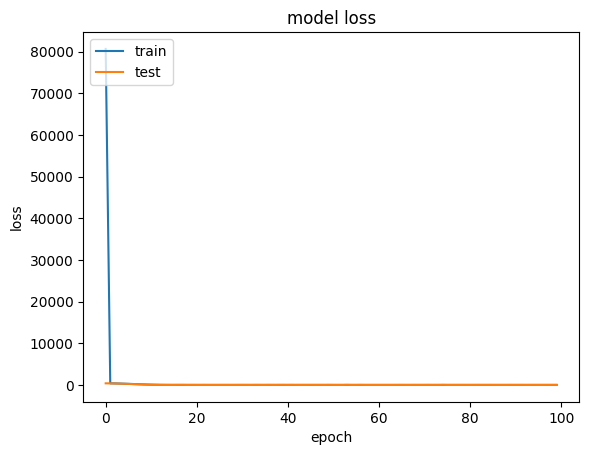

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ann.save('ccpp.keras')

In [ ]:
loaded_model=tf.keras.models.load_model('ccpp.keras')

In [ ]:
manuel_data=np.array([[15.0,40.0,1015.0,85.0]])

In [ ]:
prediction_output=loaded_model.predict(manuel_data)

1/1 [==============================] - 0s 127ms/step


In [ ]:
print(prediction_output)

[[467.06137]]
